In [1]:
!pip install git+https://github.com/statsmodels/statsmodels

  Cloning https://github.com/statsmodels/statsmodels to /private/var/folders/js/b_kfh3h54sv5lm845jd8whfc0000gn/T/pip-req-build-4kjers2r
  Running command git clone -q https://github.com/statsmodels/statsmodels /private/var/folders/js/b_kfh3h54sv5lm845jd8whfc0000gn/T/pip-req-build-4kjers2r
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Using cached scipy-1.10.1-cp39-cp39-macosx_10_9_x86_64.whl (35.2 MB)
  Using cached packaging-23.0-py3-none-any.whl (42 kB)
     |████████████████████████████████| 233 kB 2.1 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /usr/local/Caskroom/miniforge/base/envs/jupyter/bin/python3.9 /usr/local/Caskroom/miniforge/base/envs/jupyter/lib/python3.9/site-packages/pip/_vendor/pep517/_in_process.py build_wheel /var/folders/js/b_kfh3h54sv5lm845jd8whfc0000gn/T/tmpsmzpfn7k
       cwd: /private/var/folders/js/b_kfh

Invoice Date
2015-10-01    1159960.0
2015-11-01     505740.0
2016-01-01     735288.0
2016-02-01      75280.0
2016-03-01     643200.0
Name: Qty Shipped, dtype: float64


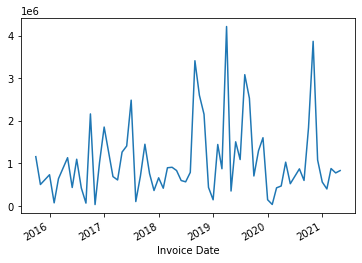

In [2]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot

def parser(x):
	return datetime.strptime(x, '%Y-%m')

series = read_csv('R290_20.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


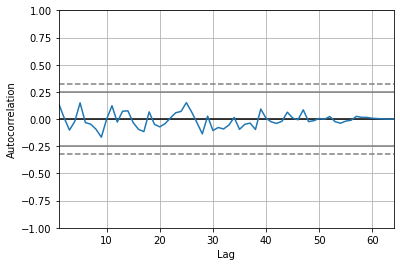

In [3]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

def parser(x):
	return datetime.strptime(x, '%Y-%m')

series = read_csv('R290_20.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
autocorrelation_plot(series)
pyplot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.'

                               SARIMAX Results                                
Dep. Variable:            Qty Shipped   No. Observations:                   64
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -962.736
Date:                Tue, 07 Dec 2021   AIC                           1931.471
Time:                        17:21:55   BIC                           1937.901
Sample:                             0   HQIC                          1934.000
                                 - 64                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5258      0.108     -4.883      0.000      -0.737      -0.315
ar.L2         -0.2266      0.132     -1.714      0.087      -0.486       0.033
sigma2      1.132e+12   2.95e-14   3.84e+25      0.0

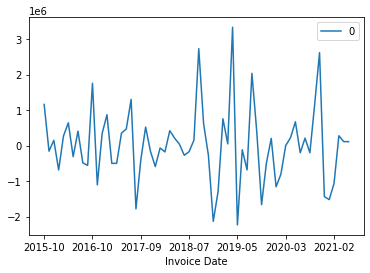

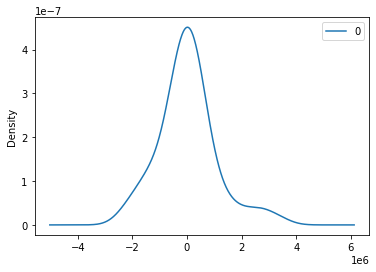

                  0
count  6.400000e+01
mean   2.076794e+04
std    1.057444e+06
min   -2.236591e+06
25%   -5.017571e+05
50%    2.081591e+04
75%    4.101880e+05
max    3.335815e+06


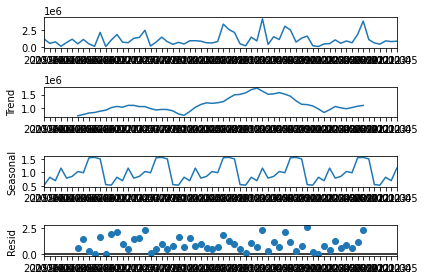


ADF Statistic: -6.783100
p-value: 0.000000
Critical Values:
	1%: -3.539
	5%: -2.909
	10%: -2.592


In [20]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
# load dataset
def parser(x):
	return datetime.strptime(x, '%Y-%m')
#series = read_csv('59116.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series = read_csv('R290_20.csv', header=0, index_col=0)
#series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(2,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())
result = seasonal_decompose(series, model='multiplicative',period=12)
result.plot()
pyplot.show()
result = adfuller(series['Qty Shipped'])
print()
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))   

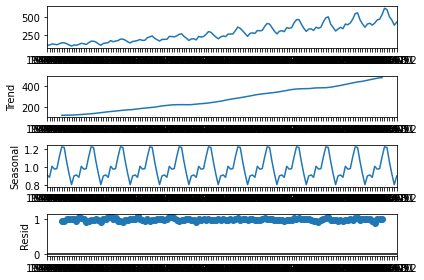

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


size=42.000000
len=22.000000
Index=0.000000, period=2019-07, predicted=1084161.64, Actual=1092040.00
Index=1.000000, period=2019-08, predicted=-251283.53, Actual=3085739.94
Index=2.000000, period=2019-09, predicted=3305095.50, Actual=2532180.00
Index=3.000000, period=2019-10, predicted=3590648.70, Actual=706200.00
Index=4.000000, period=2019-11, predicted=1136801.32, Actual=1298740.00
Index=5.000000, period=2019-12, predicted=43877.24, Actual=1604680.00
Index=6.000000, period=2020-01, predicted=1218172.70, Actual=148460.00
Index=7.000000, period=2020-02, predicted=519669.23, Actual=36780.00
Index=8.000000, period=2020-03, predicted=-637049.11, Actual=428140.00
Index=9.000000, period=2020-04, predicted=-230064.14, Actual=470920.00
Index=10.000000, period=2020-05, predicted=638120.30, Actual=1030680.00
Index=11.000000, period=2020-06, predicted=1241881.77, Actual=524380.00
Index=12.000000, period=2020-08, predicted=821561.07, Actual=873210.00
Index=13.000000, period=2020-09, predicted=84

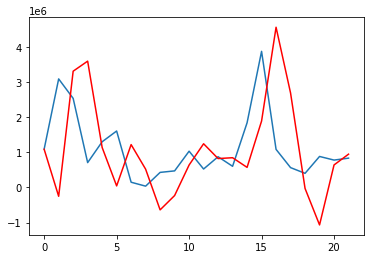

In [21]:
# evaluate an ARIMA model using a walk-forward validation
#from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
import numpy as np
def build_dfoutput(input_df, seasonal_model_results):
    """Adds inplace new seasonal cols to df given seasonal results

    Args:
        input_df (pandas dataframe)
        seasonal_model_results (statsmodels DecomposeResult object)
    """
    # Add results to original df
    input_df['observed'] = seasonal_model_results.observed
    input_df['residual'] = seasonal_model_results.resid
    input_df['seasonal'] = seasonal_model_results.seasonal
    input_df['trend'] = seasonal_model_results.trend
# load dataset
def parser(x):
	return datetime.strptime(x, '%Y-%m')
series = pd.read_csv('R290_20.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')

#
# size = 2/3 the number of values for 
#
X=series.values
size = int(len(X) * 0.66)
print('size=%f' % (size))
train, test = X[0:size], X[size:len(X)]
#print (train)
#print (test)
history = [x for x in train]
predictions = list()
lper = list()
lpredicted = list()
lactual = list()
# walk-forward validation
# print (len(test))
print('len=%f' % (len(test)))
for t in range(len(test)):
	model = ARIMA(history, order=(2,2,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	#print(history)
	per= series.index[t+size]
	lpredicted.append(yhat)
	lactual.append(obs)
	lper.append(per)
	print('Index=%f, period=%s, predicted=%.2f, Actual=%.2f' % (t,per,yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
data = {'Period':lper,
        'Predicted':lpredicted,
        'Actual':lactual}
dfoutput = pd.DataFrame(data)
dfoutput.to_csv("results.csv")								 

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
